In [25]:
# Import required libraries
from sklearn import datasets
import pandas as pd

# Load dataset
cancer = datasets.load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Display first few rows
print(df.head())

# Print feature names
print("\nFeatures of the dataset:")
print(cancer.feature_names)

# Print target values
print("\nTarget classes:")
print(cancer.target_names)


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [26]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

# Print dataset shapes
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (455, 30)
Testing Data Shape: (114, 30)


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")


Cross-validation scores: [0.97802198 0.94505495 0.97802198 0.95604396 0.93406593]
Mean cross-validation accuracy: 0.9582


In [28]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples per leaf
    'bootstrap': [True, False]  # Use bootstrap sampling
}

# Initialize GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = best_rf.predict(X_test)

# Print accuracy
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Test Accuracy: 0.9649122807017544

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



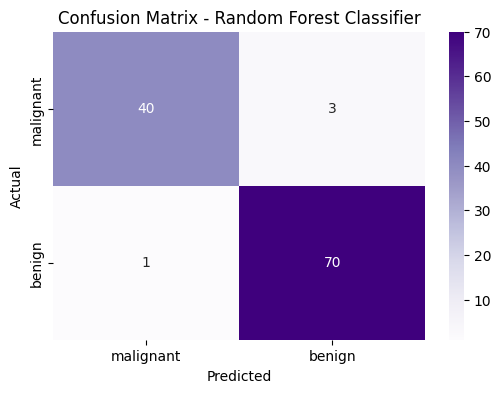

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Purples", xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()
